# The Double Slit Experiment

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Interference Phenomena

The interference pattern is formed when many waves add together after traveling different distances from source to screen (where the pattern is observed).  We start, mathematically, with the wave
$$E(r, t) = e^{i (k r - \omega t)},$$

with $k = 2 \pi / \lambda$, and $r$ is the distance the wave traveled from its initial location (at the slits).  When $N$ different waves interfere, we first need the total wave,
$$E_{\rm tot} = \sum_{m=0}^{N-1} e^{i (k r_m - \omega t)} = e^{-i \omega t} \sum_{m=0}^{N-1} e^{i k r_m} ,$$

where the sum is from $m = 0$ to $m = N-1$ to match Python's numbering scheme and the $r_m$ are the different distances that waves travel from slit to screen.  When we deal with light, the frequency of visible light waves ($\sim 10^{15}~{\rm Hz}$) is much greater than the frequency at which we can mmeasure light, so we have to average over many cycles.  This makes it mathematically convenient, because this time-averaged intensity (we will just call it "the intensity") is given (using these complex exponentials) by
$$I \propto \left\vert E_{\rm tot} \right\vert^2 = \left\vert \left( \sum_{m=0}^{N-1} e^{i k r_m} \right) \right\vert^2 = \left\vert \left( \sum_{m=0}^{N-1} e^{i (2 \pi r_m / \lambda)} \right) \right\vert^2 .$$

To calculate the intensity, we need to
- calculate the $r_m$, the distances from the slits to a given location on the screen
- calculate the sum of the complex exponentials
- take the absolute value squared of this sum

Fortunately, Python deals well with complex numbers and can do this for us. What remains is to translate these mathematical tasks into code.

The figure below illustrates the geometry of the Double Slit system with 
- $s$, the distance from the centerline to the slit 
- $y$, the distance from the centerline to the location on the screen
- $L$, the distance between the slits and the screen

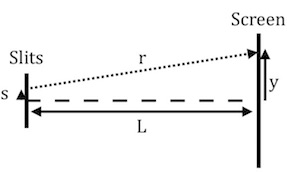

The natural units to use for these quantities are:
- $y$ in mm
- $s$ in mm
- $L$ in m
- $\lambda$, the wavelength of light, in nm

Although these are the natural units to work with, we need to use the same set of units.  Let's choose m.  The function below will create the conversion:

In [3]:
def convert_units(y_mm, s_mm, L_m, lam_nm):
    y_m = y_mm * 1e-3
    s_m = s_mm * 1e-3
    lam_m = lam_nm * 1e-9
    return y_m, s_m, L_m, lam_m

We can use this function to take inputs in the most natural units and create variables that are in SI units.  For example, run the following to convert y = 50 mm, s = 0.05 mm, L = 2 m, $\lambda$ = 400 nm.

In [4]:
print(convert_units(50,0.05,2,400))

(0.05, 5e-05, 2, 4.0000000000000003e-07)


This creates four numbers, so we can save them into four variables:

In [5]:
y, s, L, lam = convert_units(50,0.05,2,400)
print(y, s, L, lam)

0.05 5e-05 2 4.0000000000000003e-07


The distance that the waves travel is
$$r = \sqrt{(y-s)^2 + L^2}.$$

The first thing we need to do is to calculate the distance, $r$ as shown above.  Create a function that has inputs:
- ``y_in_m`` (the distance above the centerline on the screen in m)
- ``s_in_m`` (the distance above the centerline of a slit location in m)
- ``L_in_m`` (the distance between the slit and screen in m)

and outputs the distance, in meters.

Your function should take these three inputs and output the distance in meters by implementing the equtaion above.  (`np.sqrt( )` will take the square root)

To test this function, we note that (when $L \gg d$) when slits are located at $s = d/2, -d/2$, it follows that:

$\Delta r = $ ``r (y, -d/2, L) - r(y, d/2, L)`` $ = d \sin \theta$, where $L \tan \theta = y$.

Let's start with y = 50 mm, d = 0.05 mm, L = 2 m, and $\lambda = 400 m$.  Let's use our ``convert_units( )`` function to create variables that have these four values, all in meters.

Next, let's calculate $\Delta r$ by using the function we created to calculate $r$ using the inputs ``y, -d/2, L`` and ``y, d/2, L``.

To test our resuult, we need to calculate $d \sin \theta$.  We have $d$, but we need $\theta$.  We can use Python to begin to calculate, these values, beginning with $\theta = \tan^{-1} \frac{y}{L}$.  Use your appropriate variables in the ``np.arctan( )`` function below.

In [ ]:
theta = np.arctan( )

Now that we know $\theta$, use this variable to calculate $d \sin \theta$, and print out its value

# STOP:  Confirm that this is a good approximation.  If not, double check your code until the approximation works.

Next, we want to create a new function that will output the value of the wave that has wavelength, $\lambda$, after it has traveled a distance, $r$:  $e^{i 2 \pi r / \lambda}$.  Your function should have two inputs:
- $r$:  distance traveled (in m)
- $\lambda$: wavelength (in m).  Remember ``lambda`` is reserved by Python, so it cannot be your variable name.

The output from the function should be $e^{i 2 \pi r / \lambda}$.  We will do our unit conversion **before** this function (that's why both inputs should be in units of m), so we don't need to worry about it.

Test your function out with each of the $r$ values from before to make sure it works (i.e., runs without error and returns a complex number).

Finally, we want to find the intensity of light created by the double slit.  The double slit will have two waves that need to be added, one from $s = +d/2$ (let's call that $r_+$) and a second from $s = -d/2$ (let's call that $r_-$).  To find the intensity, we will add the waves from each slit (in complex exponential form as you just completed), <b>then</b> take the absolute value squared of this complex number (``np.abs()`` takes the absolute value of any number):  
$${\rm intensity} = \big\vert\, e^{i 2 \pi r_+ / \lambda} + e^{i 2 \pi r_- / \lambda} \,\big\vert^2 .$$

To do this, we'll first <b>create a function</b> that finds the intensity at a location y on the screen, that takes as inputs:
- y in mm
- d in mm (the distance between the slits, assumed equidistant from the center line so that there's one slit at +d/2 and one at -d/2)
- L in m
- wavelength in nm

We will do:
1. First, convert the four inputs into meters.
1. Calculate $r_+$ using $s = d/2$ as the appropriate input to calculate $r_+$
1. Use $r_+$ to calculate $e^{i 2 \pi r_+ / \lambda}$.
1. Calculate $r_-$ using $s = -d/2$ as the appropriate input to calculate $r_-$
1. Use $r_-$ to calculate $e^{i 2 \pi r_- / \lambda}$
1. Add the two waves, $e^{i 2 \pi r_+ / \lambda} + e^{i 2 \pi r_- / \lambda}$, then take the absolute value squared and return this result as the intensity at location y.

Note that your functions for calculating $r$ and calculating the complex wave requires inputs in meters, so that first conversion step is essential.

Now, this function allows us to make a plot.  The independent variable for our plot should be y and dependent variable is the intensity at this given y.  

Make a plot of the intensity versus y for y from -50 to 50 mm, with d = 0.05 mm, L = 2 m, and $\lambda$ = 400 nm.

How do we know we're right?  Textbooks will tell us that the interference pattern has a maximum when:

$$\displaystyle d \sin \theta = m \lambda  \qquad L \tan \theta = y \qquad {\rm with}  \qquad m = 0, \pm 1, \ldots$$

Calculate where we expect to find the maxima and compare with your plot.  Does it match?  If not, you either need to check your calculations or check your code.  (``np.arcsin()`` is the arcsin).  Do not move on until you are confident in your answer.

To do this, create a function whose inputs are 
- $m$, an integer known as the mode number
- $d$, the slit spacing in mm
- $L$, the distance to the screen in m
- $\lambda$, the wavelength in nm 

and whose output is the value of y (in whatever units you find appropriate).  

To do this:
- You should first create a function that converts the units of the inputs to your function to meters.
- You should think about solving the equations by having at least one intermediate step.

Use your function to confirm the locations of the m = -2, -1, 0, 1, 2 maxima.  **Fix your code if these do not agree.**

Now, what happens if you change d, L or $\lambda$?  

We can answer this with a slider.  

First we need to create a function that takes d, L and $\lambda$ as inputs, and makes a plot of intensity vs. y.  Then create a slider with three variables that will make a single plot with three sliders.  Allow for d = 0.01 to 0.10 in increments of 0.01; L = 1 to 2 in increments of 0.1; and $\lambda$ = 400 to 700 in increments of 20.



## Completing this lab in its entirety is Homework 4.  Please Submit by Monday, March 13

Before you submit, make sure that your code works with Kernel > Restart & Run All